In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\lamborghini_sales_2020_2025.csv")

In [6]:
df .head()

,Model,Year,Region,Color,Fuel Type,Base Price (USD),Horsepower,Sales Volume,Turbo (Yes/No)
0,Urus,2020,EMEA,Black,Gasoline,230000,641,4500,Yes
1,Urus,2020,Americas,White,Gasoline,240000,641,4800,Yes
2,Urus,2020,APAC,Red,Gasoline,235000,641,2700,Yes
3,Huracán,2020,EMEA,Yellow,Gasoline,260000,631,2500,Yes
4,Huracán,2020,Americas,Orange,Gasoline,270000,631,2600,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             54 non-null     object
 1   Year              54 non-null     int64 
 2   Region            54 non-null     object
 3   Color             54 non-null     object
 4   Fuel Type         54 non-null     object
 5   Base Price (USD)  54 non-null     int64 
 6   Horsepower        54 non-null     int64 
 7   Sales Volume      54 non-null     int64 
 8   Turbo (Yes/No)    54 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.9+ KB


In [8]:
df.isnull().sum()

Model               0
Year                0
Region              0
Color               0
Fuel Type           0
Base Price (USD)    0
Horsepower          0
Sales Volume        0
Turbo (Yes/No)      0
dtype: int64

In [9]:
df['Base Price (USD)'].value_counts()

Base Price (USD)
240000    3
560000    3
270000    3
570000    3
235000    2
290000    2
265000    2
550000    2
245000    2
275000    2
260000    2
300000    2
250000    2
280000    2
580000    2
230000    1
555000    1
575000    1
565000    1
255000    1
285000    1
585000    1
590000    1
500000    1
520000    1
510000    1
320000    1
310000    1
295000    1
330000    1
340000    1
335000    1
380000    1
390000    1
385000    1
Name: count, dtype: int64

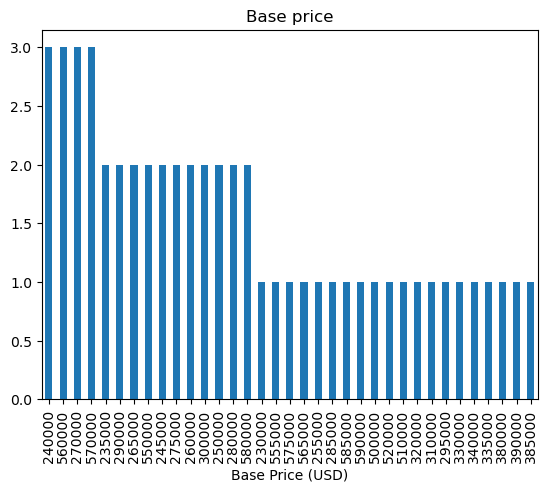

In [10]:
df['Base Price (USD)'].value_counts().plot(kind='bar')
plt.title ('Base price')
plt.show()

In [12]:
from sklearn .model_selection import train_test_split
from sklearn .compose import ColumnTransformer
from sklearn .pipeline import Pipeline 
from sklearn .preprocessing import OneHotEncoder,StandardScaler
from sklearn .impute import SimpleImputer
from sklearn .metrics import accuracy_score,r2_score

In [13]:
x = df.drop(['Base Price (USD)'],axis=1)
y = df['Base Price (USD)']

In [14]:
numerical_cols =  x.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [17]:
numerical_transformer = Pipeline(steps=[
                                 ('imputer',SimpleImputer(strategy='mean')),
                                 ('scaler',StandardScaler())
])

In [18]:
categorical_transformer = Pipeline(steps=[
                                   ('imputer',SimpleImputer(strategy='most_frequent')),
                                   ('onhot',OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer(transformers=[
                                             ('num',numerical_transformer,numerical_cols),
                                              ('cat',categorical_transformer,categorical_cols)
])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)

In [21]:
from sklearn .linear_model import LinearRegression

In [22]:
model_1 = Pipeline(steps=[
                    ('pre',preprocessor),('reg',LinearRegression())
])

In [23]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Horsepower',
                                                   'Sales Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Model', 'Region', 'Color',
                                                   'Fuel Type',
                                                   'Turbo (Yes/No)'])])),
                ('reg', LinearRegression())])

In [24]:
prediction_1= model_1.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_1)*100:.4f}')

Accuracy:98.1904


In [25]:
from sklearn .tree import DecisionTreeRegressor

In [26]:
model_2  = Pipeline(steps=[
                     ('pre',preprocessor),('reg',DecisionTreeRegressor(max_depth=5,random_state=42))
])

In [27]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Horsepower',
                                                   'Sales Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Model', 'Region', 'Color',
                                                   'Fuel Type',
                                                   'Turbo (Yes/No)'])])),
                ('reg', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [28]:
prediction_2 = model_2.predict(X_test)

print(f'Accuracy:{r2_score(y_test,prediction_2)*100:.4f}')

Accuracy:96.2675


In [29]:
from sklearn .ensemble import RandomForestRegressor 

In [30]:
model_3 = Pipeline(steps=[
                    ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [31]:
model_3.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Horsepower',
                                                   'Sales Volume']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Model', 'Region', 'Color',
                                                   'Fuel Type',
                                                   'Turbo (Yes/No)'])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [32]:
prediction_3 = model_3.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_3)*100:.4f}')

Accuracy:90.3637


i am compare 3 model and i get best accuracy to give me linearregression model.